In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
haberman = pd.read_csv("/content/drive/My Drive/Dataset/haberman.csv")

In [72]:
#number of rows and columns
print(haberman.shape)

(306, 4)


In [73]:
#columns name
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Correlation across all features

In [74]:
haberman.corr()

,age,year,nodes,status
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
nodes,-0.063176,-0.003764,1.000000,0.286768
status,0.067950,-0.004768,0.286768,1.000000


In [93]:
#counts of each value in respective column

print(haberman["age"].value_counts())
print(haberman["year"].value_counts())
print(haberman["nodes"].value_counts())
print(haberman["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python

In [76]:
bins = [0,30,40,50,60,70,120]
labels = ['Below 30','31-40','41-50','51-60','61-70','70+']
haberman['age_group'] = pd.cut(haberman["age"], bins=bins, labels=labels, right=False)

Count Plot of different age groups

Text(0.5, 1.0, 'Count plot of different age-group')

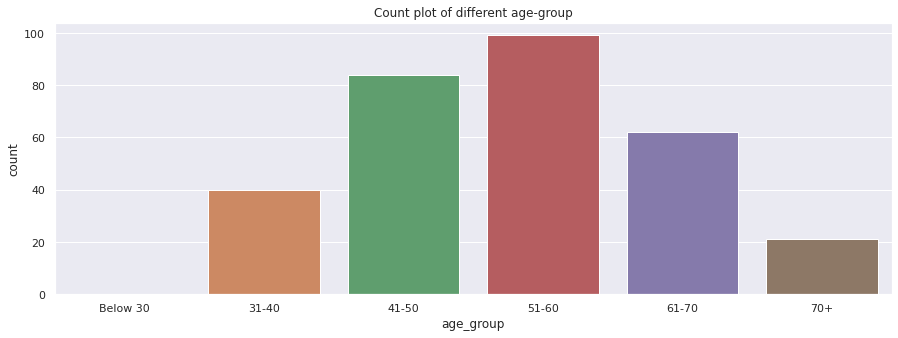

In [77]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=haberman['age_group'], data=haberman).set_title('Count plot of different age-group')

Scatter plot between age and nodes

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


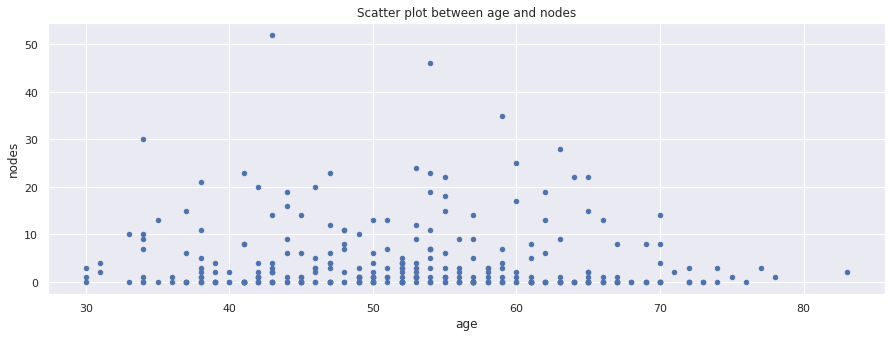

In [78]:
#scatter plot between age and nodes to see how datas are distributed
sns.set(rc={'figure.figsize':(15,5)})
haberman.plot(kind="scatter", x="age", y="nodes").set_title('Scatter plot between age and nodes')
plt.show()

Distribution plot of nodes

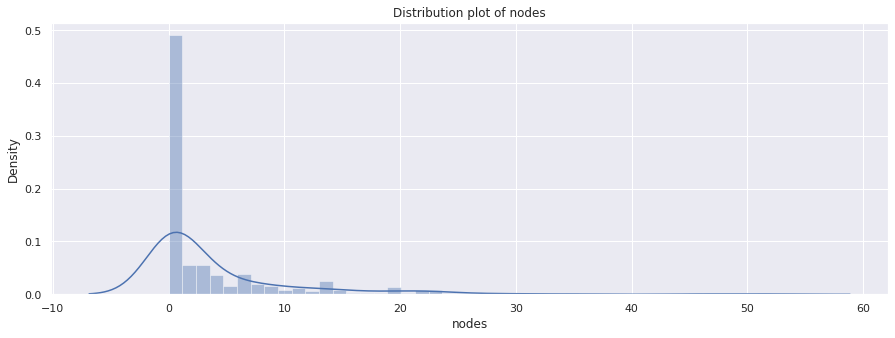

In [79]:
#Distribution plot for nodes column
#line is kde
sns.set(rc={'figure.figsize':(15,5)})
sns.distplot(haberman["nodes"], kde=True).set_title('Distribution plot of nodes')
plt.show()

Count plot of status

Text(0.5, 1.0, 'Count plot of status(1&2)')

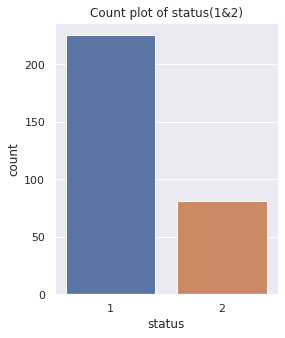

In [80]:
sns.set(rc={'figure.figsize':(4,5)})
sns.countplot(x=haberman['status'], data=haberman).set_title('Count plot of status(1&2)')

Facet Grid between age and nodes

https://stackoverflow.com/questions/55767312/how-to-position-suptitle

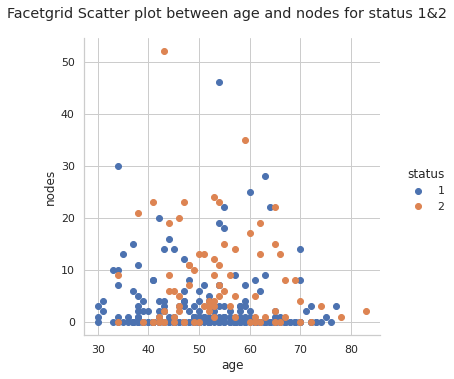

In [92]:
#scatter plot between age and nodes with status as color
#sns.set_style("whitegrid") gives white colored grid in background
#add_legend() shows legends in right side of graph
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
a = sns.FacetGrid(haberman, hue="status", height=5).map(plt.scatter, "age", "nodes").add_legend()
a.fig.suptitle('Facetgrid Scatter plot between age and nodes for status 1&2', y=1.05)
plt.show()

Pairplot between age, year, nodes with status as hue(color)

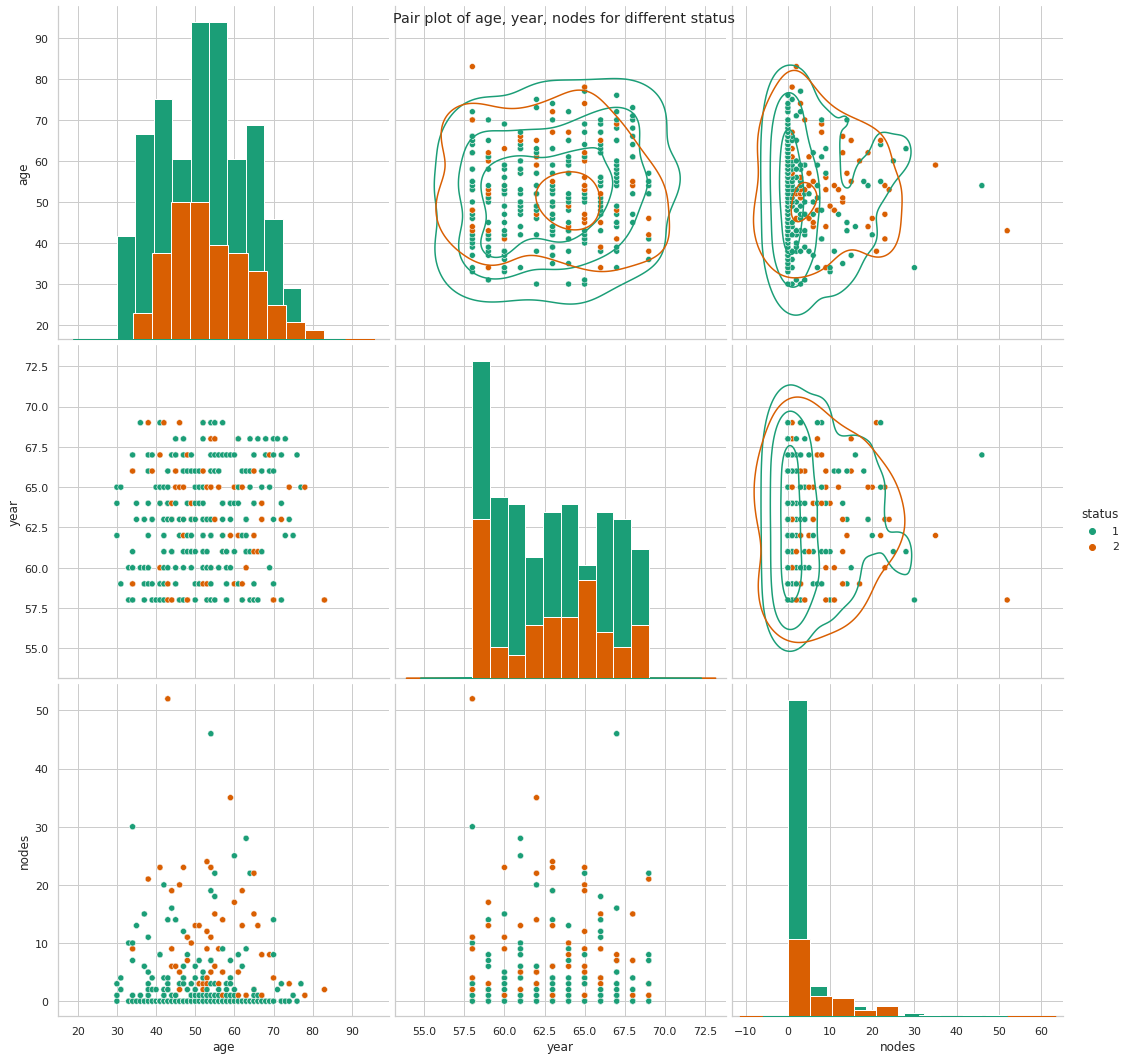

In [82]:
#pairplot between all columns in haberman dataset with status as color
#Upper diagonal with scatter plot
#lower diagonal with kde plot
#diagonal with histogram
sns.set_style("whitegrid")
g = sns.pairplot(haberman, hue="status", size=5, palette='Dark2')
g.fig.suptitle('Pair plot of age, year, nodes for different status')
g.map_lower(sns.scatterplot,color='red')
g.map_upper(sns.kdeplot, levels=4, color=".2")
g.map_diag(plt.hist)
plt.show()

Distribution plot of age, year, nodes

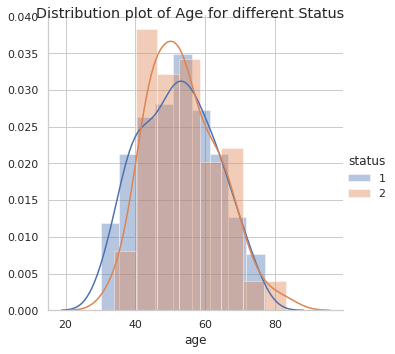

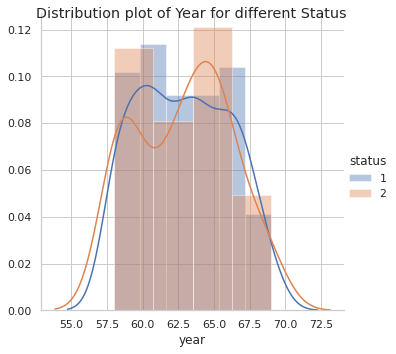

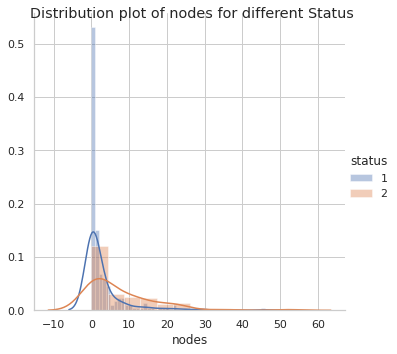

In [83]:
#Distribution plot for column with status as color
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")

a=sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "age").add_legend()
a.fig.suptitle('Distribution plot of Age for different Status')

b=sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "year").add_legend()
b.fig.suptitle('Distribution plot of Year for different Status')

c=sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "nodes").add_legend()
c.fig.suptitle('Distribution plot of nodes for different Status')

plt.show()

PDF & CDF plot of age

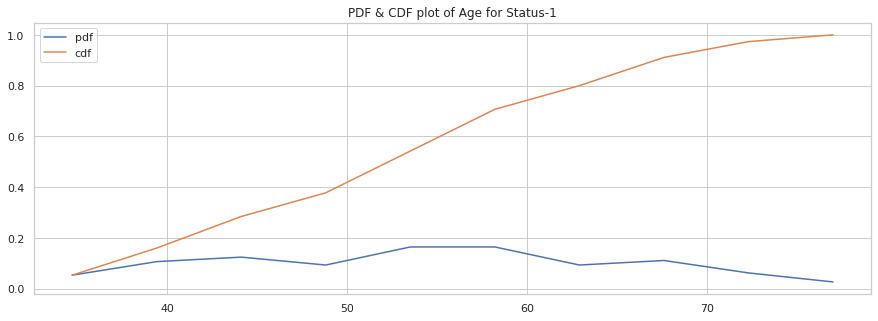

--------------------------------------------------------------------------------------------------------------


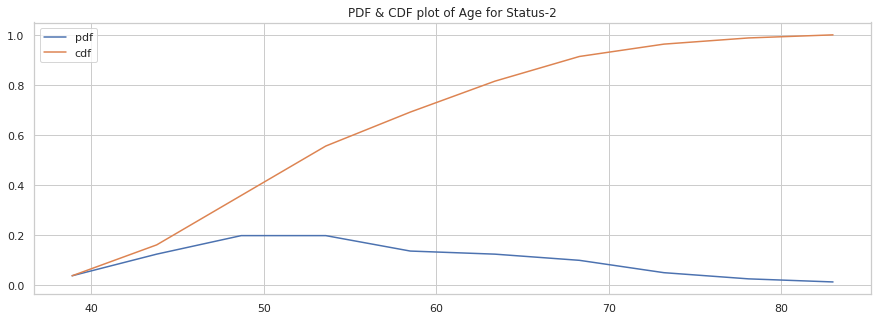

In [84]:
haberman_one = haberman.loc[haberman["status"] == 1]
haberman_two = haberman.loc[haberman["status"] == 2]
count_one, bined_one = np.histogram(haberman_one["age"], bins=10, density=True)
count_two, bined_two = np.histogram(haberman_two["age"], bins=10, density=True)
pdf1 = count_one/sum(count_one)
cdf1 = np.cumsum(pdf1)
plt.plot(bined_one[1:], pdf1, label='pdf')
plt.plot(bined_one[1:], cdf1, label='cdf')
plt.legend()
plt.title('PDF & CDF plot of Age for Status-1')
plt.show()
print('-'*110)

pdf2 = count_two/sum(count_two)
cdf2 = np.cumsum(pdf2)
plt.plot(bined_two[1:], pdf2, label='pdf')
plt.plot(bined_two[1:],cdf2, label='cdf')
plt.title('PDF & CDF plot of Age for Status-2')
plt.legend()
plt.show()

PDF & CDF plot of nodes

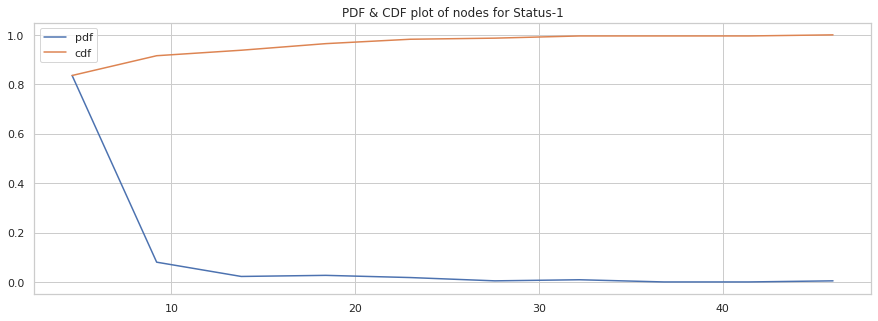

--------------------------------------------------------------------------------------------------------------


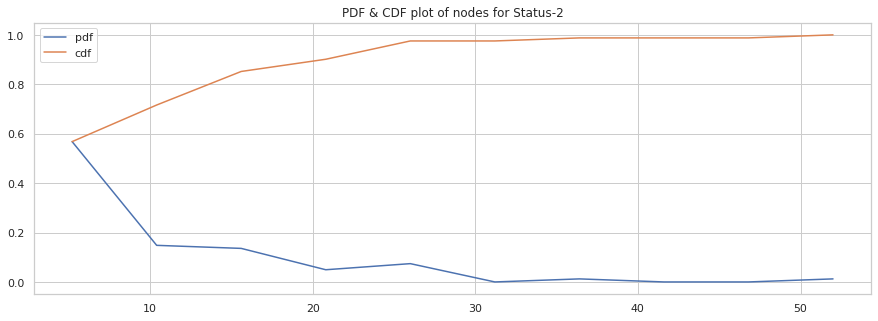

In [85]:
plt.figure(figsize=(15,5))
haberman_one = haberman.loc[haberman["status"] == 1]
haberman_two = haberman.loc[haberman["status"] == 2]
count_one, bined_one = np.histogram(haberman_one["nodes"], bins=10, density=True)
count_two, bined_two = np.histogram(haberman_two["nodes"], bins=10, density=True)
pdf1 = count_one/sum(count_one)
cdf1 = np.cumsum(pdf1)
plt.plot(bined_one[1:], pdf1, label='pdf')
plt.plot(bined_one[1:], cdf1, label='cdf')
plt.legend()
plt.title('PDF & CDF plot of nodes for Status-1')
plt.show()
print('-'*110)

pdf2 = count_two/sum(count_two)
cdf2 = np.cumsum(pdf2)
plt.figure(figsize=(15,5))
plt.plot(bined_two[1:], pdf2, label='pdf')
plt.plot(bined_two[1:],cdf2, label='cdf')
plt.title('PDF & CDF plot of nodes for Status-2')
plt.legend()
plt.show()

Mean & Standard Deviation of age

In [86]:
#Mean for different columns with numpy module
print("Means")
print(round(np.mean(haberman_one["age"])))
print(np.mean(haberman_two["age"]))

#Standard Deviation for different columns with numpy module
print("\nStandard Deviation")
print(np.std(haberman_one["age"]))
print(np.std(haberman_two["age"]))

Means
52
53.67901234567901

Standard Deviation
10.98765547510051
10.10418219303131


Medain, Quantiles, 90th Percentile, Median Absolute Deviation of age

In [87]:
#Median for different columns with numpy module
print("Median")
print(np.median(haberman_one["age"]))
print(np.median(haberman_two["age"]))

#Quantiles for different columns with numpy module
print("\nQuantiles")
print(np.percentile(haberman_one["age"], np.arange(0, 100, 25)))
print(np.percentile(haberman_two["age"], np.arange(0, 100, 25)))

#90th Percentile for different columns with numpy module
print("\n90th percentile")
print(np.percentile(haberman_one["age"], 90))
print(np.percentile(haberman_two["age"], 90))

#Mean Absolute Deviation for different columns with numpy module
from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(haberman_one["age"]))
print(robust.mad(haberman_two["age"]))

Median
52.0
53.0

Quantiles
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th percentile
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


Box Plot between age and status

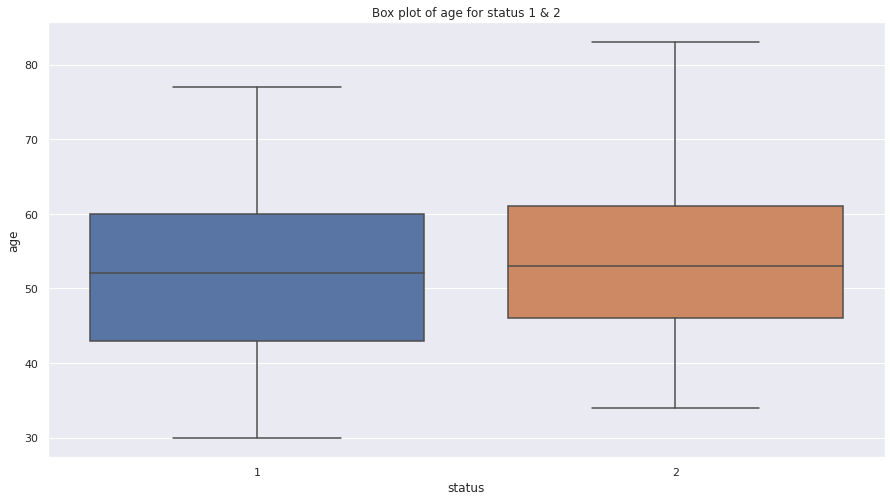

In [88]:
#Box and Whisker plot
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x="status", y="age", data=haberman).set_title('Box plot of age for status 1 & 2')
plt.show()

Violin plot between age and status

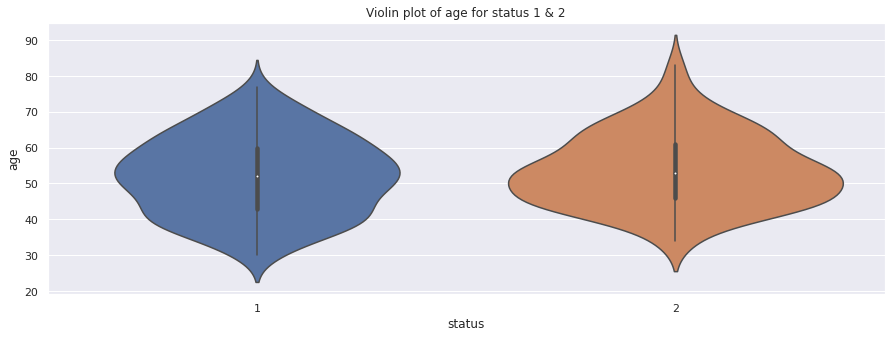

In [89]:
#Violin plot
sns.set(rc={'figure.figsize':(15,5)})
sns.violinplot(x="status", y="age", data=haberman, size=100).set_title('Violin plot of age for status 1 & 2')
plt.show()

Joint plot(kde) between age and nodes

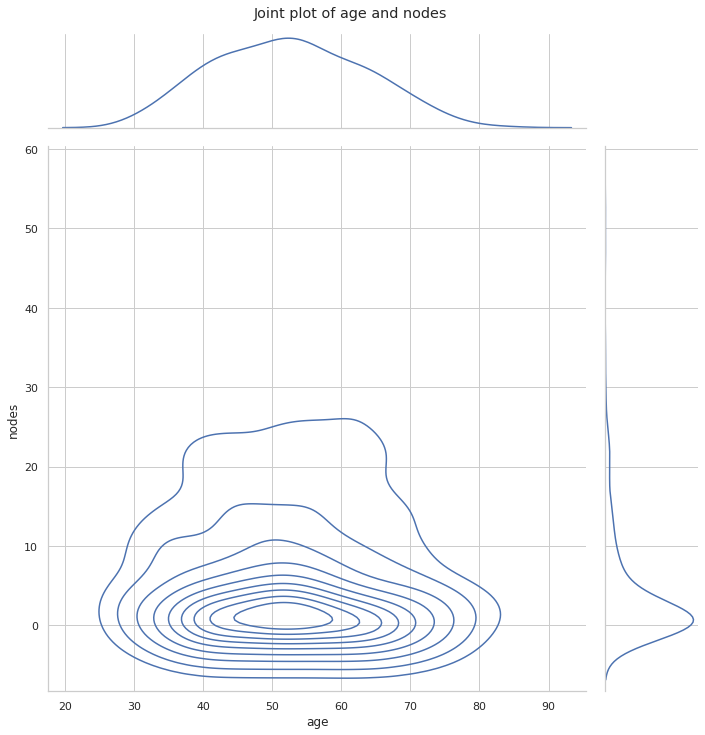

In [90]:
#Joint plot between age and nodes
#x-axis showing pdf of age
#y-axis showing pdf of nodes
sns.set_style("whitegrid")
a = sns.jointplot(x="age", y="nodes", data=haberman, kind="kde", size=10)
a.fig.suptitle('Joint plot of age and nodes', y=1.02)
plt.show()

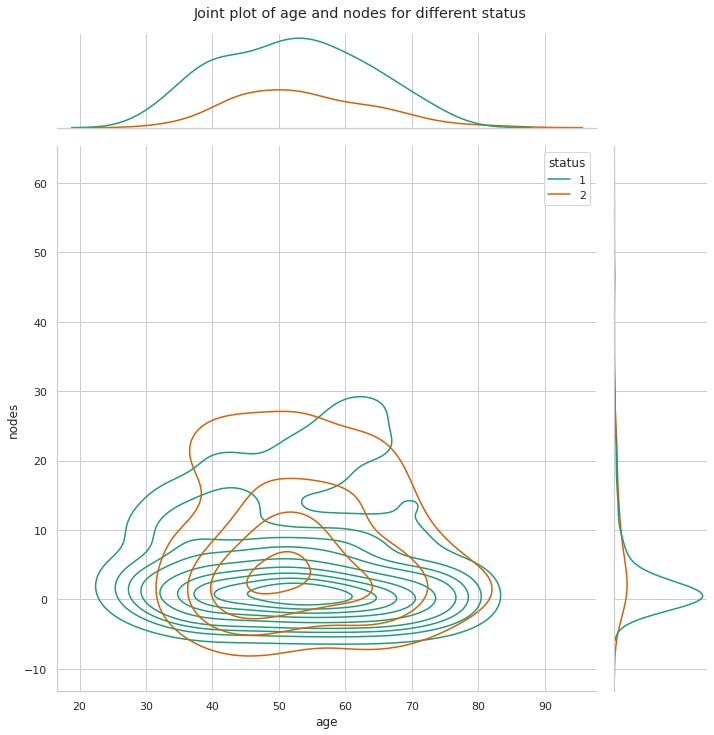

In [91]:
4#Joint plot between age and nodes
#x-axis showing pdf of age
#y-axis showing pdf of nodes
a=sns.jointplot(x="age", y="nodes", data=haberman, kind="kde",hue='status', palette='Dark2', size=10)
a.fig.suptitle('Joint plot of age and nodes for different status', y=1.02)
plt.show()

<h1>Conclusion</h1>

1. From the count plot of different age groups, we observed most people are in age 51-60 followed by 41-50, 61-70, 31-40, 70+
2. Node-1 has higher occurance
3. Status-1 has larger count
4. From distribution plot of age with status as color, we conclude that status-1 has mean of around 51 , status-2 ahs mean ofariund 48
5. From PDF/CDF plot of status-1, we conclude that around 90% of people having age less than 67
6. From PDF/CDF plot of status-2, we conclude that around 90% of people having age less than 66
7. Status-2 has higher avereage age than status-1
8. Status-2 has lower Standard Deviation in age than status-1
9. Status-2 has higher median age than status-1
10. Both status-1 & status-2 has same 90th percentile
11. Status-1 has higher Median Absolute Deviation than status-2
12. From box plot(status Vs age) between status-1 and status-2, 
13. From Violin plot(status Vs age) between status-1 and status-2, we conclude that status-1 has higher standard deviation compared to status-2
14. From pair plot betwen age and nodes, age has almost normal distribution with wider standard deviation and nodes has normal distribution with right skew.